In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
laptop = pd.read_csv("final_dataset.csv")

### Exploratory Data Analysis

In [25]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1564 non-null   object 
 1   price             1564 non-null   int64  
 2   brand             1564 non-null   object 
 3   model             1564 non-null   object 
 4   processor         1564 non-null   float64
 5   ram memory        1564 non-null   int64  
 6   display size      1564 non-null   float64
 7   storage capacity  1564 non-null   int64  
 8   cpu cores         1564 non-null   int64  
 9   graphics card     1098 non-null   float64
 10  rating            1564 non-null   float64
 11  reviews           1564 non-null   int64  
 12  name              1564 non-null   object 
 13  url               1564 non-null   object 
 14  image             1375 non-null   object 
 15  instock           1564 non-null   object 
dtypes: float64(4), int64(5), object(7)
memory 

In [26]:
laptop.describe()

,price,processor,ram memory,display size,storage capacity,cpu cores,graphics card,rating,reviews
count,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1098.000000,1564.000000,1564.000000
mean,123543.181586,5.475064,10.528133,14.912276,540.153453,6.565857,2325.601093,0.286957,0.230818
std,73742.517817,1.558320,5.081534,0.895630,269.053509,2.955440,925.737358,1.109482,2.194286
min,25500.000000,2.000000,4.000000,10.500000,64.000000,1.000000,0.000000,0.000000,0.000000
25%,73999.000000,5.000000,8.000000,14.000000,256.000000,4.000000,1650.000000,0.000000,0.000000
50%,104994.500000,5.000000,8.000000,15.600000,512.000000,6.000000,2800.000000,0.000000,0.000000
75%,150000.000000,7.000000,16.000000,15.600000,512.000000,8.000000,3050.000000,0.000000,0.000000
max,555555.000000,9.000000,32.000000,17.300000,2048.000000,24.000000,4070.000000,5.000000,73.000000


In [27]:
# Specify specific columns for which you want to print value counts
columns_to_check = [ 'brand', 'model',]

# Iterate through specified columns and print value counts
for column in columns_to_check:
    print("Column:", column)
    print(laptop[column].value_counts())
    print()

Column: brand
brand
dell         335
acer         327
asus         322
lenovo       254
hp           176
msi           79
apple         26
avita          9
mi             6
microsoft      5
honor          4
gateway        3
dynabook       3
chuwi          3
xlab           3
nova           2
razer          2
toshiba        1
level51        1
huawei         1
chiwi          1
gigabyte       1
Name: count, dtype: int64

Column: model
model
Aspire 5           77
Nitro 5            53
Aspire 3           49
Vostro 3520        45
Predator Helios    27
                   ..
E410M 14            1
Celeron N4020       1
ThinkPad L13        1
Pavilion Ryzen      1
Inspiron 5625       1
Name: count, Length: 557, dtype: int64



### Basic Visualization

In [42]:
cols = list(laptop.columns)

# Remove the specified columns
excluded_cols = ['id', 'brand', 'model', 'rating', 'reviews', 'name', 'url', 'image', 'instock']
cols = [col for col in cols if col not in excluded_cols]

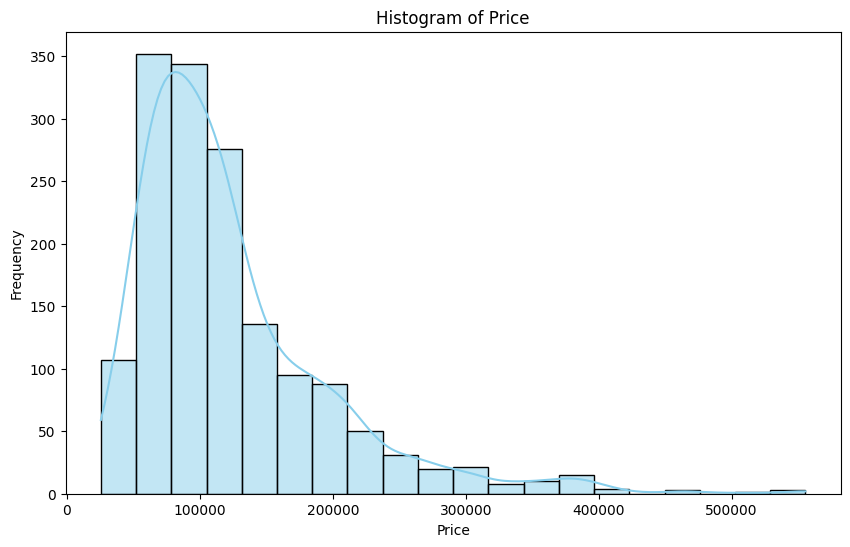

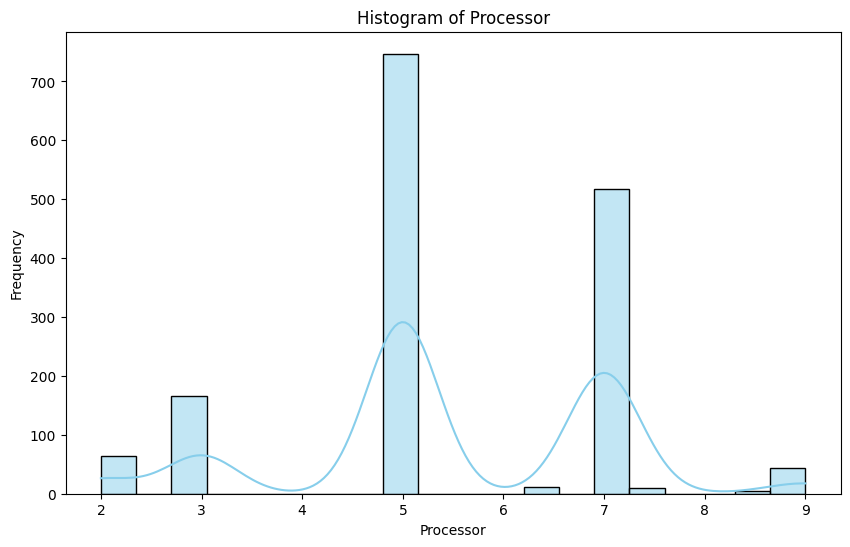

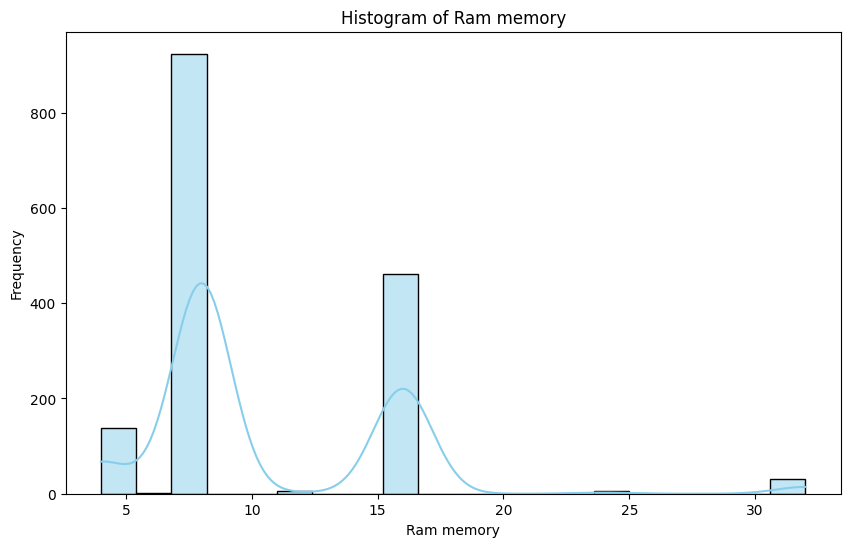

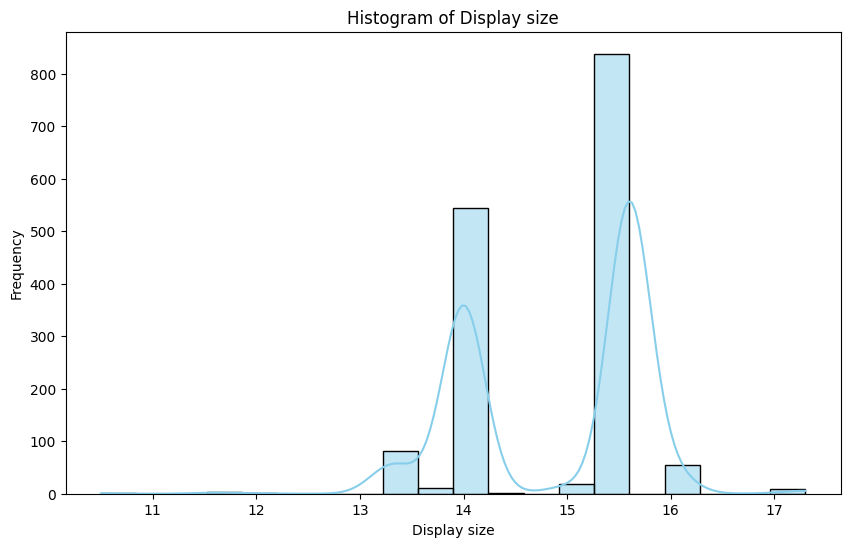

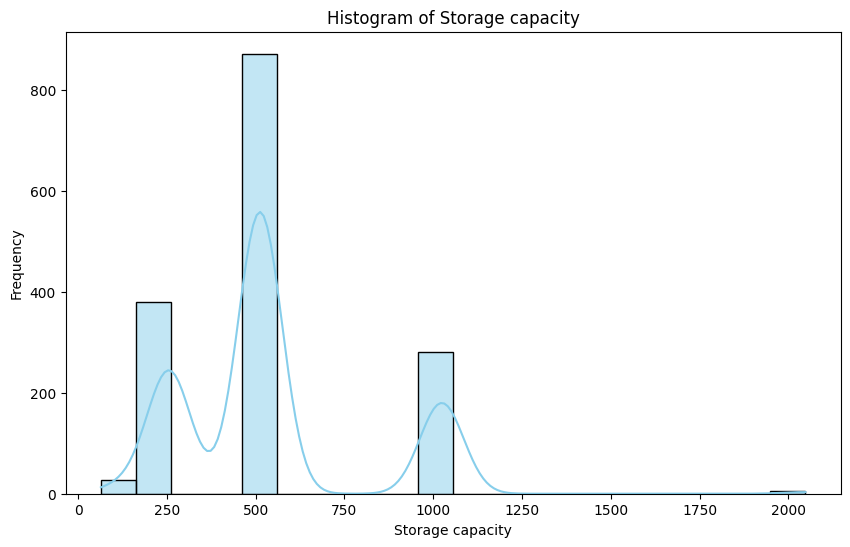

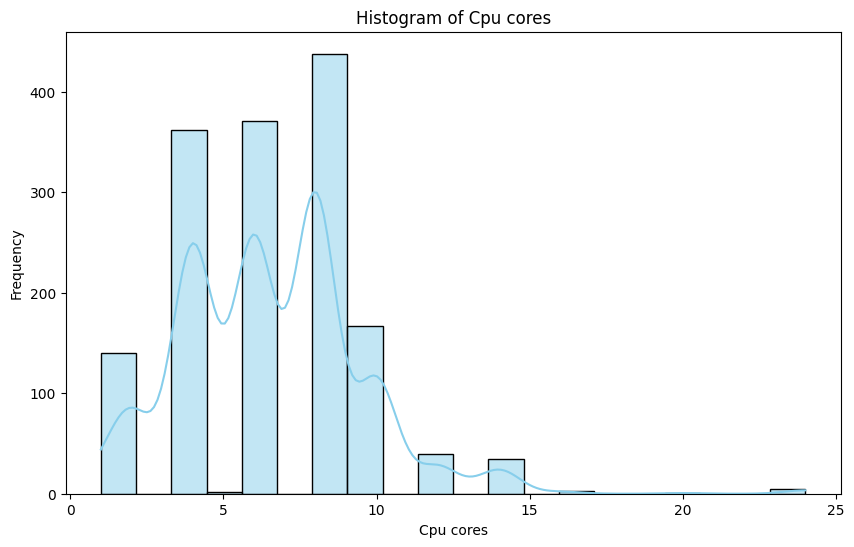

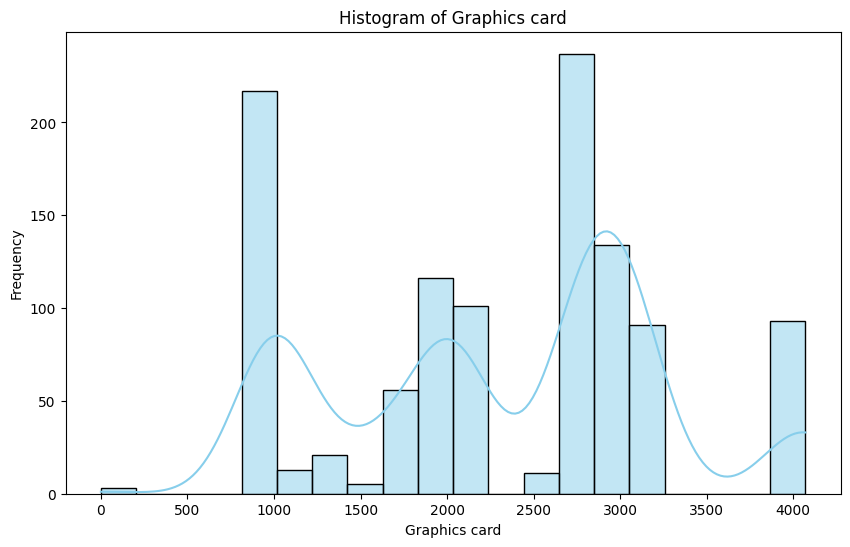

In [40]:


# Loop through each column and create a histogram
for col in cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=laptop, x=col, bins=20, color='skyblue', kde=True)
    plt.title(f'Histogram of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.show()


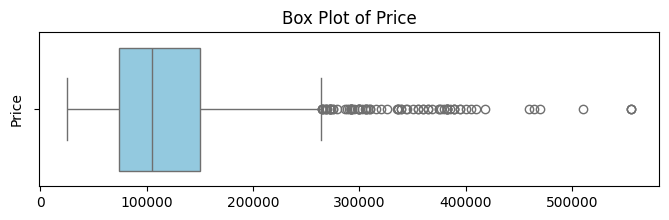

Column: price
price
85000     23
120000    22
105000    20
125000    17
110000    16
          ..
214999     1
68500      1
139318     1
53999      1
96990      1
Name: count, Length: 656, dtype: int64



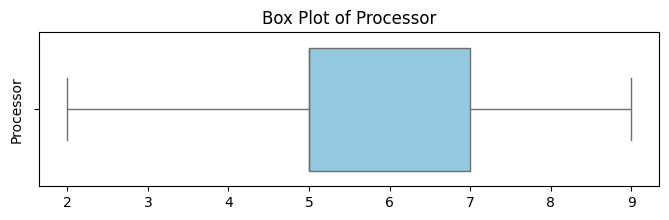

Column: processor
processor
5.0    747
7.0    518
3.0    166
2.0     64
9.0     43
6.5     11
7.5     10
8.5      5
Name: count, dtype: int64



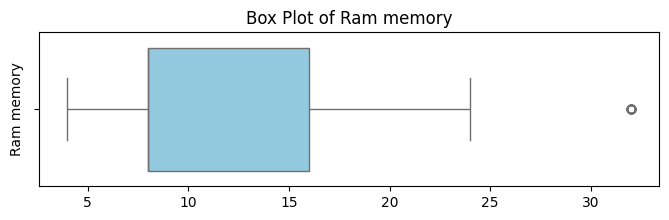

Column: ram memory
ram memory
8     924
16    461
4     138
32     30
12      5
24      5
6       1
Name: count, dtype: int64



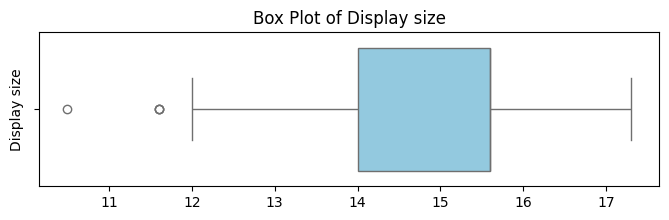

Column: display size
display size
15.6    838
14.0    533
13.3     77
16.0     45
15.0     19
13.6     11
14.1     11
17.3      8
16.1      8
13.5      5
11.6      3
14.5      2
16.2      1
10.5      1
12.0      1
17.0      1
Name: count, dtype: int64



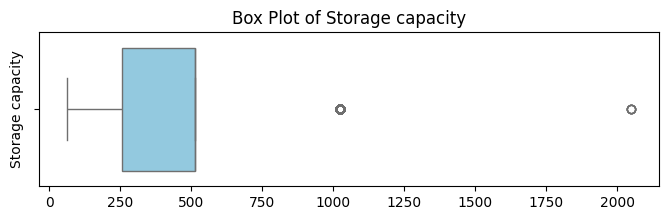

Column: storage capacity
storage capacity
512     872
256     379
1024    281
128      25
2048      5
64        2
Name: count, dtype: int64



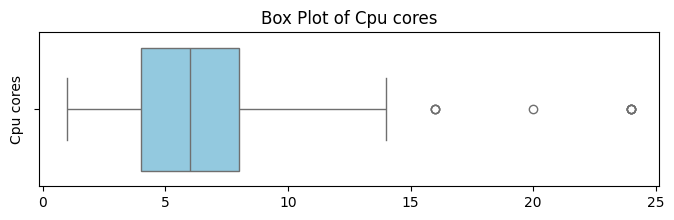

Column: cpu cores
cpu cores
8     438
6     371
4     362
10    167
2     113
12     40
14     35
1      27
24      5
16      3
5       2
20      1
Name: count, dtype: int64



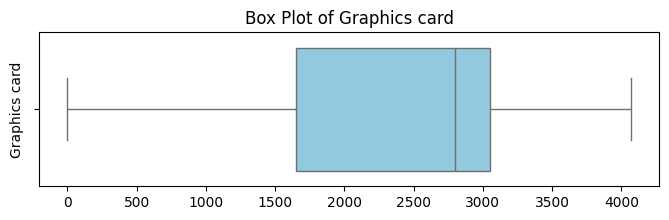

Column: graphics card
graphics card
2800.0    237
1000.0    217
3050.0    134
2000.0    116
2050.0     86
3060.0     69
4050.0     48
1650.0     44
4060.0     35
3070.0     22
1300.0     15
1050.0     13
1660.0     12
2500.0     11
4070.0     10
2070.0      8
1400.0      6
2060.0      6
1500.0      5
0.0         3
2040.0      1
Name: count, dtype: int64



In [41]:
# Loop through each column and create a box plot
for col in cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(data=laptop, x=col, color='skyblue')
    plt.title(f'Box Plot of {col.capitalize()}')
    plt.xlabel('')  # No need for x label as it's a single variable plot
    plt.ylabel(col.capitalize())
    plt.show()
    print("Column:", col)
    print(laptop[col].value_counts())
    print()


In [ ]:
ram_prices = laptop.groupby(by='ram memory')['price']
# 4, 8, 16
group = ram_prices.apply(lambda x: x.reset_index(drop=True), include_groups=False)
rams = {}
for ram, prices in ram_prices:
    rams[ram] = prices.copy()
    print(f"Summary Statistics of {ram} GB RAM")
    print(rams[ram].describe())

In [ ]:
ram_group = laptop.groupby(by='ram memory')

for ram, prices in ram_group:
    if ram in [4, 8, 16]:
        norm_count = prices['price'].value_counts()
        df = norm_count.reset_index()
        df.columns = ['price', 'count']
        plt.figure(figsize=(8,6))
        sns.barplot(data=df, x='price', y='count', hue='count', palette='viridis', dodge=False)
        plt.title(f"Count for of {ram} GB RAM")
        plt.xticks([])
        plt.show()

### Bivariate Visualization

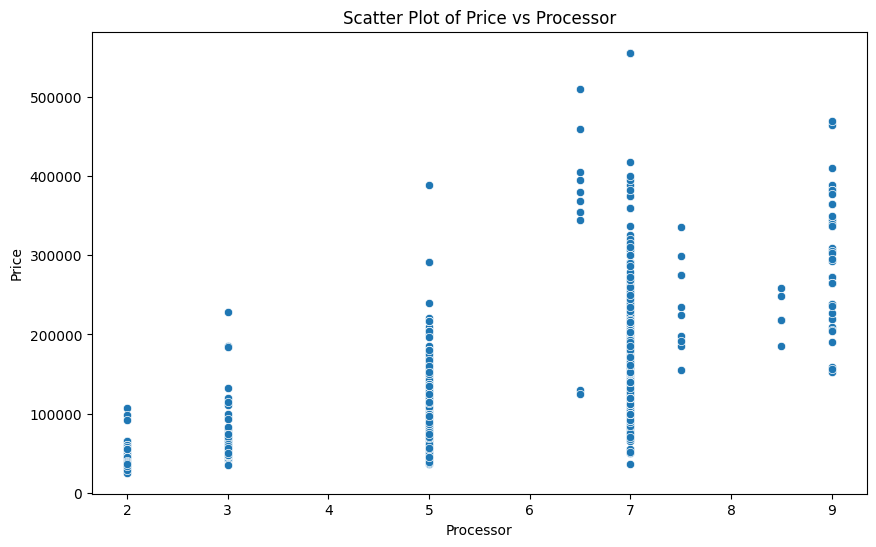

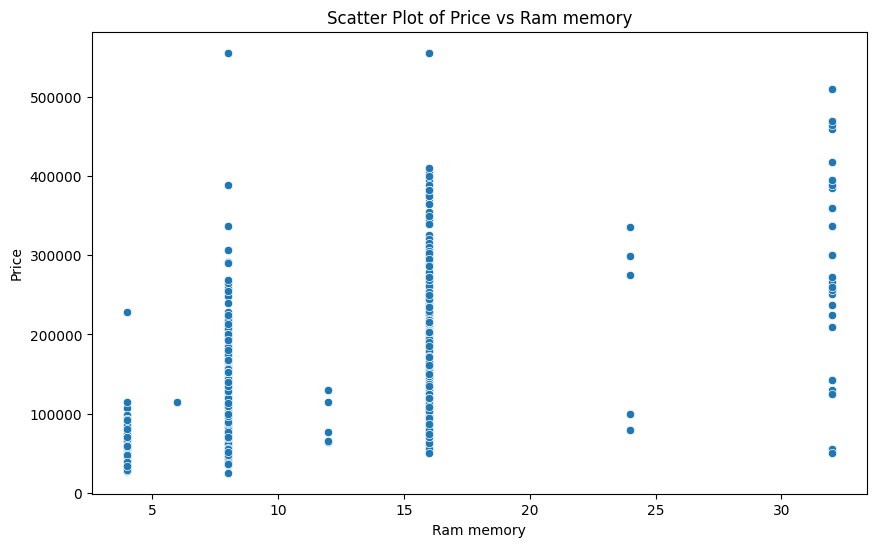

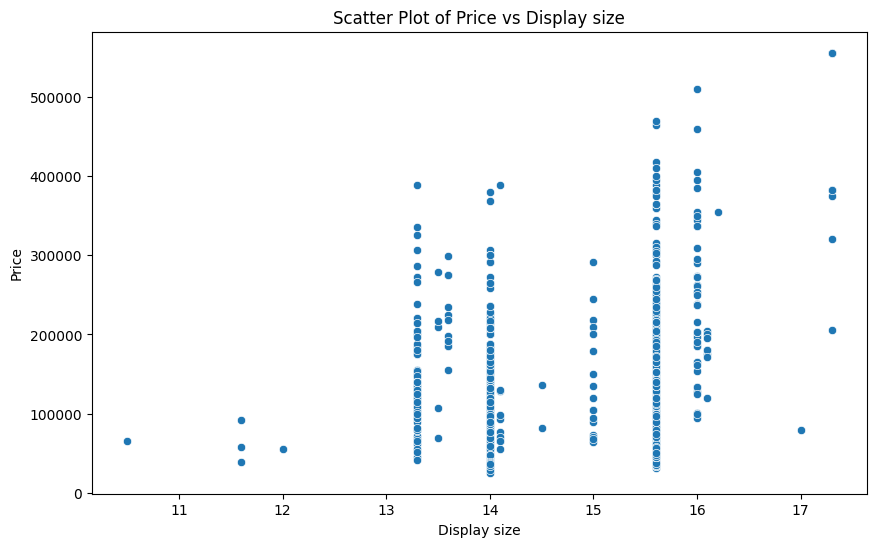

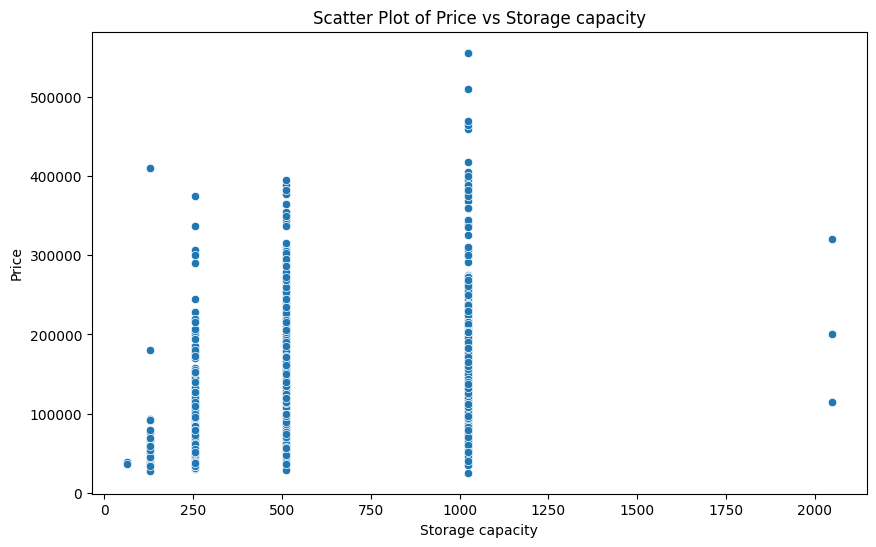

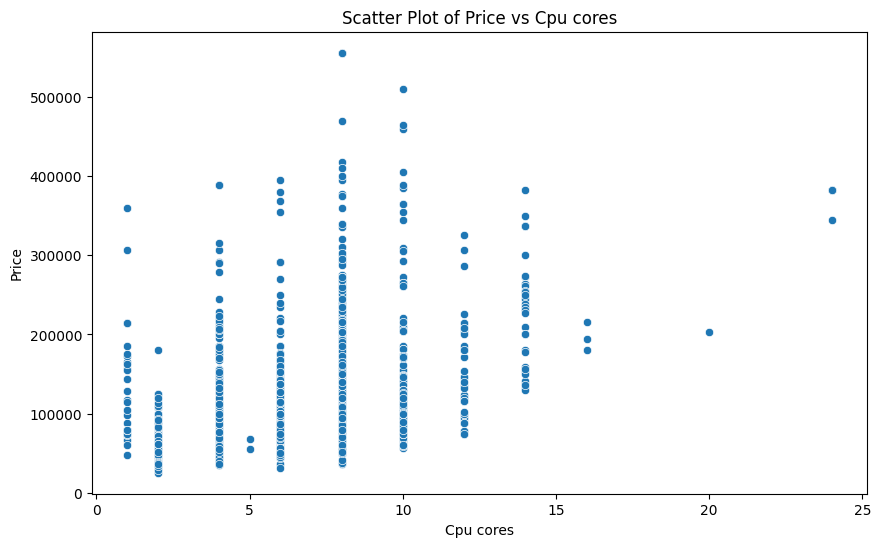

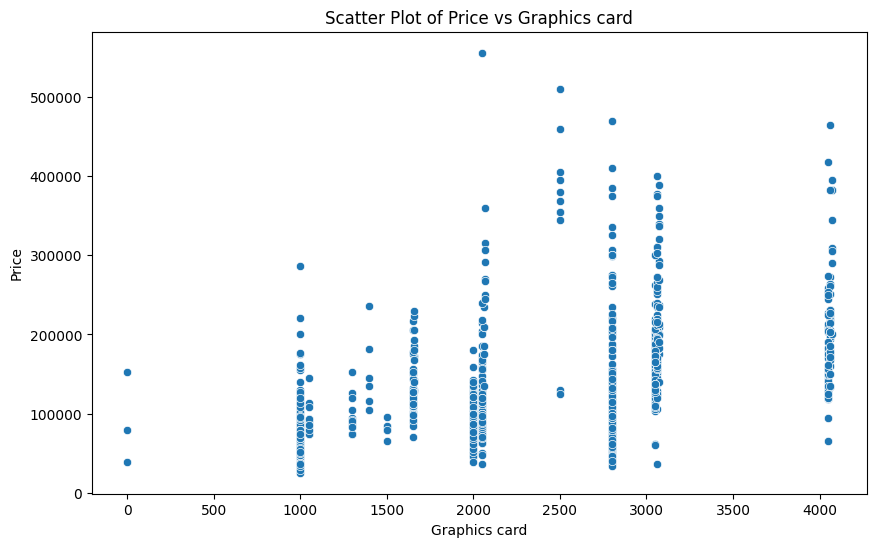

In [44]:
# List of columns to plot against 'price'
cols_to_plot = ['processor', 'ram memory', 'display size', 'storage capacity', 'cpu cores', 'graphics card']

# Loop through each column and create a scatter plot with 'price'
for col in cols_to_plot:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=laptop, x=col, y='price')
    plt.title(f'Scatter Plot of Price vs {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Price')
    plt.show()

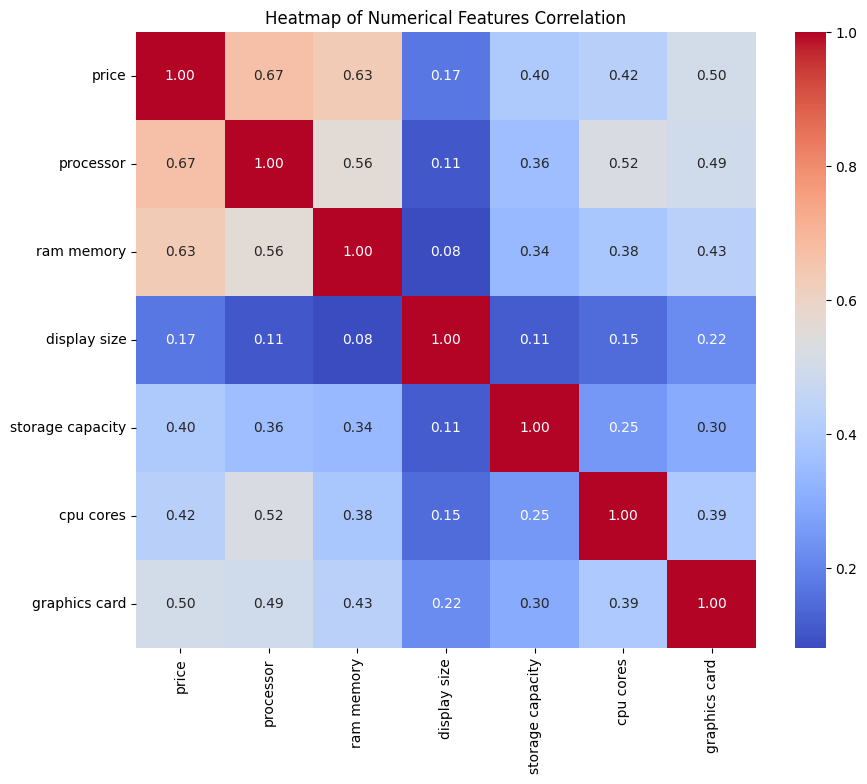

In [43]:
# Heatmap
# Create a DataFrame with only the numerical columns
numerical_data = laptop[cols]

# Calculate the correlation matrix
corr_matrix = numerical_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Features Correlation')
plt.show()